In [7]:
import dataloader as dl
import importlib
import detect_pulses as dp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks



imported_data, imported_data_details = dl.import_data(r"C:\Users\jelle\OneDrive - Delft University of Technology\TM12005 Advanced Signal Processing\opdracht 2\data")
data = dl.restructure_data(imported_data)



In [8]:
leads = {}
for i in range(12):
    leads[f'lead_{i+1}'] = data['005_Pimpel_1.mat', 'data'][:,i]

In [ ]:
importlib.reload(dp)

imported_data, imported_data_details = dl.import_data(r"E:\OneDrive\School\Technical Medicine\TM Jaar 1\TM12004 - Advanced Signal Processing\data")
data = dl.restructure_data(imported_data)

mask_filter = dp.filter_data(data,"005_Pimpel.mat")
mask_pulses = dp.detect_pulses(data, mask_filter, "005_Pimpel.mat")

data_plot = data_test[1000:1500,1]
data_mask = mask_pulses[1000:1500,1]

fs = 200

time = np.arange(0,len(data_plot),1) / fs


plt.plot(time, data_plot)
plt.plot(time[data_mask],np.zeros(len(data_plot[data_mask])),"*")


In [ ]:
data_test = data["005_Pimpel.mat","data"]
data_plot = data_test[1000:1500,1]
data_mask = mask_pulses[1000:1500,1]

time = np.arange(0,len(data_plot),1) / fs


plt.plot(time, data_plot)
plt.plot(time[data_mask],np.zeros(len(data_plot[data_mask])),"*")



In [ ]:
indices = np.where(leads['lead_2'] < -3000)[0]


# Create a DataFrame with indices and their differences
test = pd.DataFrame({
    'indices': indices,
    'diff': np.diff(indices, prepend=indices[0])
})

test['diff'].value_counts()

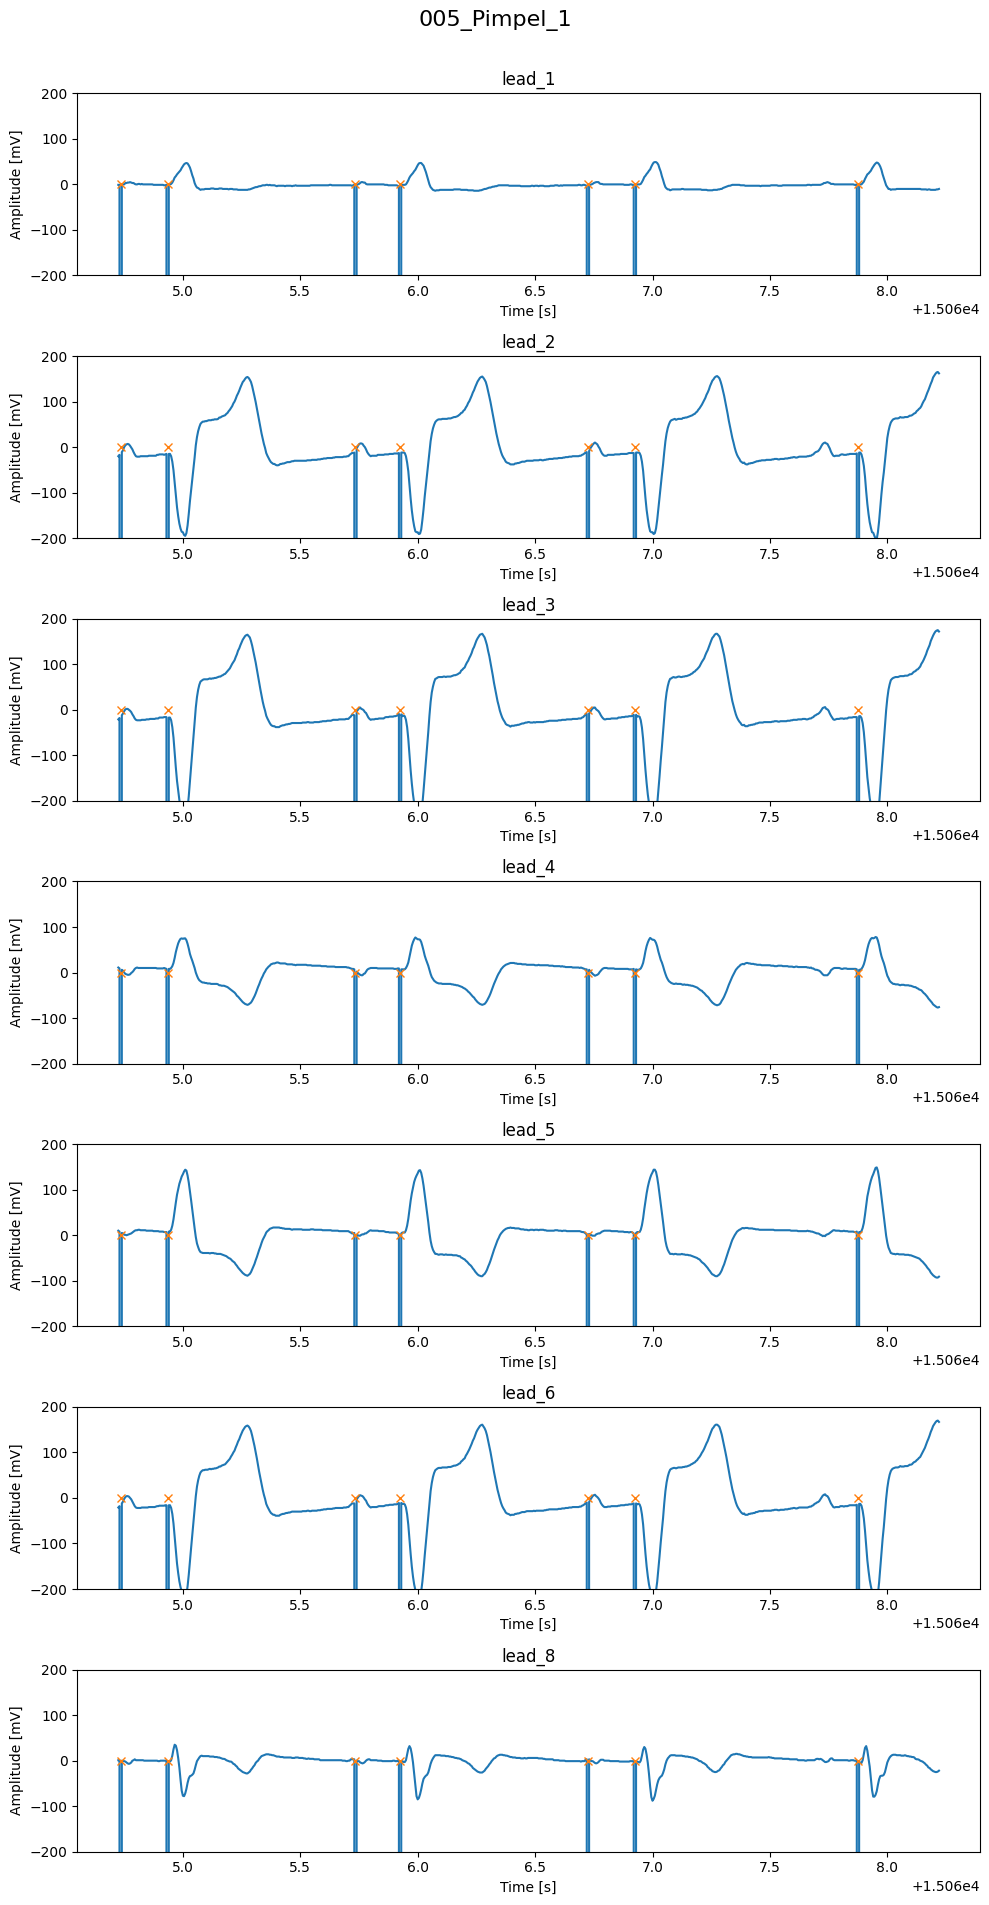

: 

In [ ]:
# xlim pimpel = ax[index].set_xlim(1202000, 1204000)
# pimpel_1 = 8802000:8804000. Lijkt op sensing atrium en activating ventrikels (AV-block). Beter: slice(432047-200,432047+500)
# pimpel_2 = 12200 :13000. pacing in atrium, (276727 :277927) of (2618275 :2618875) pacing in ventrikels (geen p-top). Beter: around = 1274817
# pimpel_3 = 6993  :7793. pacing in atrium. 415139  :415639 pacing in atrium en ventrikels


leads_names = ["lead_1", "lead_2", "lead_3", "lead_4", "lead_5", "lead_6", "lead_8"]

fs = 200

around = 3013345

indexes = slice(around-400,around+300)
time_values = np.arange(indexes.start, indexes.stop) / fs
fig, ax = plt.subplots(len(leads_names),1, figsize=(10, 20))


for index, i in enumerate(leads_names):
    data = leads[i][indexes]
    ax[index].plot(time_values, data)
    ax[index].set_title(i)
    ax[index].set_ylim(-200, 200)
    ax[index].set_xlabel("Time [s]")
    ax[index].set_ylabel("Amplitude [mV]")
# Find peaks
    pulses = data < -3000  # Adjust height parameter as needed
    ax[index].plot(time_values[pulses], np.zeros(len(data[pulses])), "x")  # Mark peaks with 'x'

fig.suptitle("005_Pimpel_1", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.975])
#plt.save("pimpel_1.png")
